In [50]:
import pandas as pd
from binance.client import Client
import datetime as dt
import numpy as np

lines = []
with open('C:/Users/John Carlo/Documents/python/binance_things.txt', 'r') as f:
    lines = f.readlines()

count = 0
for line in lines:
    count += 1
    #print(f'line {count}: {line}')
    
#print(lines)
#print(lines[0].replace("\n",""))
api_key = lines[0].replace("\n","")
api_secret = lines[1]
client = Client(api_key, api_secret)
symbol = "ADAUSDT"
interval='1d'
Client.KLINE_INTERVAL_1DAY
klines = client.get_historical_klines(symbol, interval, "1 Jan,2021")
data_raw = pd.DataFrame(klines)
 # create colums name
data_raw.columns = ['open_time','Open', 'High', 'Low', 'Close', 'Volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
# change the timestamp
# original line -> data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data_raw.index = [dt.datetime.fromtimestamp(x/1000.0).strftime("%Y-%m-%d") for x in data_raw.close_time]
#data_raw.to_csv(symbol+'.csv', index = None, header=True)
##convert data to float and plot
#df = data.astype(float)
#df["close"].plot(title = 'ADAUSDT', legend = 'close')
data = data_raw.drop(columns=['open_time','close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore'])
data.insert(4, 'Adj Close', data['Close'])
data.index.name='Date'
print(type(data))

print('###########')
print(type(data['Open'][0]))
print(type(data['High'][0]))
print(type(data['Low'][0]))
print(type(data['Close'][0]))
print(type(data['Adj Close'][0]))
print(type(data['Volume'][0]))


data['Open'] = data['Open'].astype(np.float64)
data['High'] = data['High'].astype(np.float64)
data['Low'] = data['Low'].astype(np.float64)
data['Close'] = data['Close'].astype(np.float64)
data['Adj Close'] = data['Adj Close'].astype(np.float64)
data['Volume'] = data['Volume'].astype(np.float64)

print(type(data['Open'][0]))
print(type(data['High'][0]))
print(type(data['Low'][0]))
print(type(data['Close'][0]))
print(type(data['Adj Close'][0]))
print(type(data['Volume'][0]))
data

<class 'pandas.core.frame.DataFrame'>
###########
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-02,0.18134,0.18473,0.17000,0.17509,0.17509,4.622016e+08
2021-01-03,0.17505,0.18457,0.16793,0.17742,0.17742,6.603033e+08
2021-01-04,0.17740,0.20960,0.17255,0.20615,0.20615,1.201451e+09
2021-01-05,0.20625,0.23992,0.19203,0.22528,0.22528,1.463416e+09
2021-01-06,0.22518,0.26429,0.20696,0.25873,0.25873,1.478888e+09
...,...,...,...,...,...,...
2022-08-08,0.51140,0.53850,0.50630,0.52760,0.52760,1.110262e+08
2022-08-09,0.52760,0.54960,0.52300,0.53710,0.53710,1.615248e+08
2022-08-10,0.53710,0.53740,0.50570,0.51290,0.51290,1.430305e+08


In [51]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()
startdate = date(2021,1,1)
end_date = date.today()
stocksymbols = ['ADAUSDT']

2022-08-11


In [45]:
# stocksymbols = ['AAPL']

# def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
#      data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
#      return data
# data = getMyPortfolio(stocksymbols)
# print(type(data))

# print('###########')
# print(type(data['Open'][0]))
# print(type(data['High'][0]))
# print(type(data['Low'][0]))
# print(type(data['Close'][0]))
# print(type(data['Adj Close'][0]))
# print(type(data['Volume'][0]))
# data

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
###########
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.333542,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.087097,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.670685,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.305809,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.581650,109578200
...,...,...,...,...,...,...
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900


# SMA Method back testing


In [52]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [53]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2021-01-02,0.18134,0.18473,0.17000,0.17509,0.17509,4.622016e+08,NaN,NaN,NaN,NaN
2021-01-03,0.17505,0.18457,0.16793,0.17742,0.17742,6.603033e+08,NaN,NaN,NaN,NaN
2021-01-04,0.17740,0.20960,0.17255,0.20615,0.20615,1.201451e+09,NaN,NaN,NaN,NaN
2021-01-05,0.20625,0.23992,0.19203,0.22528,0.22528,1.463416e+09,NaN,NaN,NaN,NaN
2021-01-06,0.22518,0.26429,0.20696,0.25873,0.25873,1.478888e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.51140,0.53850,0.50630,0.52760,0.52760,1.110262e+08,0.487460,0.532736,NaN,NaN
2022-08-09,0.52760,0.54960,0.52300,0.53710,0.53710,1.615248e+08,0.489430,0.530551,NaN,NaN
2022-08-10,0.53710,0.53740,0.50570,0.51290,0.51290,1.430305e+08,0.491113,0.527785,NaN,NaN


In [54]:
selected_rows = data[~data['Buy_Signal_price'].isnull()]
print(selected_rows)

               Open     High      Low    Close  Adj Close       Volume  \
Date                                                                     
2021-04-11  1.20201  1.25199  1.19157  1.21747    1.21747  290774078.0   
2021-08-19  1.92400  2.16430  1.87000  2.10430    2.10430  486614298.9   
2022-04-16  0.93300  0.95900  0.92900  0.95600    0.95600   42541809.7   

              SMA 30   SMA 100  Buy_Signal_price  Sell_Signal_price  
Date                                                                 
2021-04-11  1.177189  0.820650           1.21747                NaN  
2021-08-19  1.508127  1.506226           2.10430                NaN  
2022-04-16  1.052867  1.047930           0.95600                NaN  


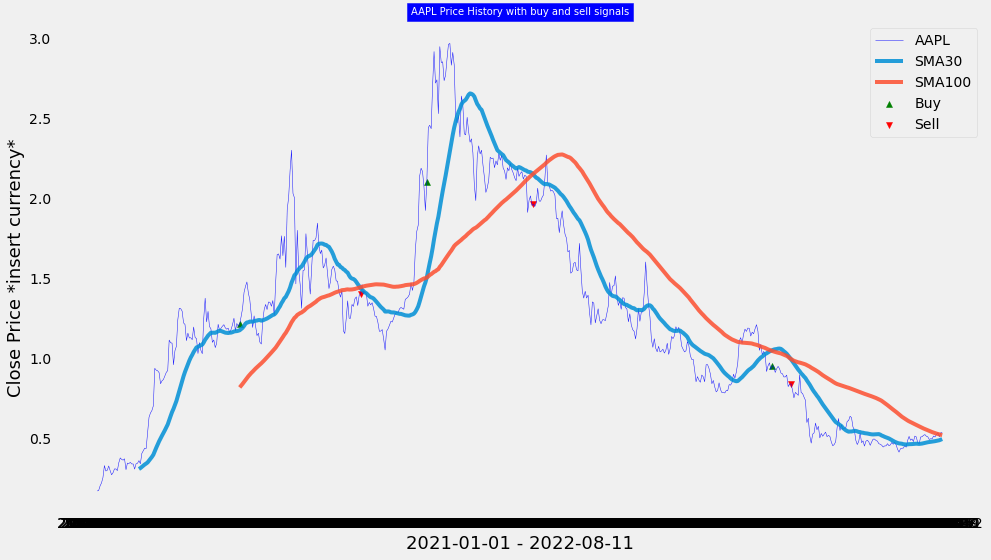

In [55]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price *insert currency*' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

# MACD Method Backtesting

In [56]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
...,...,...,...
2022-08-08,0.009417,0.001230,0.008187
2022-08-09,0.010968,0.002225,0.008743
2022-08-10,0.010127,0.001108,0.009020


In [57]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2021-01-02,0.18134,0.18473,0.17000,0.17509,0.17509,4.622016e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.17505,0.18457,0.16793,0.17742,0.17742,6.603033e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.17740,0.20960,0.17255,0.20615,0.20615,1.201451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.20625,0.23992,0.19203,0.22528,0.22528,1.463416e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,0.22518,0.26429,0.20696,0.25873,0.25873,1.478888e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.51140,0.53850,0.50630,0.52760,0.52760,1.110262e+08,0.487460,0.532736,NaN,NaN,0.009417,0.001230,0.008187
2022-08-09,0.52760,0.54960,0.52300,0.53710,0.53710,1.615248e+08,0.489430,0.530551,NaN,NaN,0.010968,0.002225,0.008743
2022-08-10,0.53710,0.53740,0.50570,0.51290,0.51290,1.430305e+08,0.491113,0.527785,NaN,NaN,0.010127,0.001108,0.009020


In [58]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [59]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy

In [60]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2021-01-02,0.18134,0.18473,0.17000,0.17509,0.17509,4.622016e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-01-03,0.17505,0.18457,0.16793,0.17742,0.17742,6.603033e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-01-04,0.17740,0.20960,0.17255,0.20615,0.20615,1.201451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-01-05,0.20625,0.23992,0.19203,0.22528,0.22528,1.463416e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2021-01-06,0.22518,0.26429,0.20696,0.25873,0.25873,1.478888e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.51140,0.53850,0.50630,0.52760,0.52760,1.110262e+08,0.487460,0.532736,NaN,NaN,0.009417,0.001230,0.008187,NaN,NaN,True
2022-08-09,0.52760,0.54960,0.52300,0.53710,0.53710,1.615248e+08,0.489430,0.530551,NaN,NaN,0.010968,0.002225,0.008743,NaN,NaN,True
2022-08-10,0.53710,0.53740,0.50570,0.51290,0.51290,1.430305e+08,0.491113,0.527785,NaN,NaN,0.010127,0.001108,0.009020,NaN,NaN,False


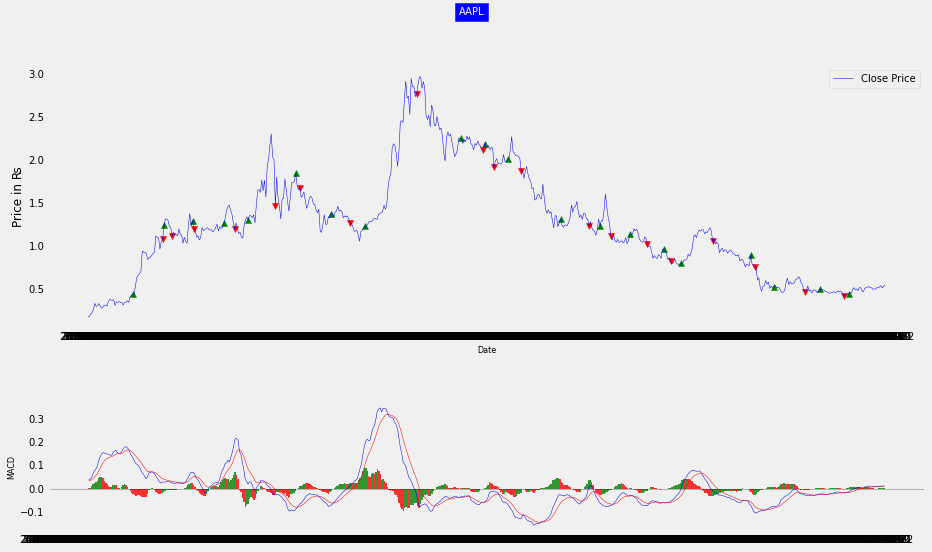

In [61]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in *insert currency')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

# Bollinger Band Backtesting strategy

In [62]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [63]:
#storing the function
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,0.18134,0.18473,0.17000,0.17509,0.17509,4.622016e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.17505,0.18457,0.16793,0.17742,0.17742,6.603033e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.17740,0.20960,0.17255,0.20615,0.20615,1.201451e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.20625,0.23992,0.19203,0.22528,0.22528,1.463416e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,0.22518,0.26429,0.20696,0.25873,0.25873,1.478888e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.51140,0.53850,0.50630,0.52760,0.52760,1.110262e+08,0.487460,0.532736,NaN,NaN,...,NaN,NaN,True,0.473647,0.505680,0.537713,12.669260,0.842148,NaN,NaN
2022-08-09,0.52760,0.54960,0.52300,0.53710,0.53710,1.615248e+08,0.489430,0.530551,NaN,NaN,...,NaN,NaN,True,0.472125,0.506775,0.541425,13.674759,0.937589,NaN,NaN
2022-08-10,0.53710,0.53740,0.50570,0.51290,0.51290,1.430305e+08,0.491113,0.527785,NaN,NaN,...,NaN,NaN,False,0.473906,0.507870,0.541834,13.375164,0.574049,NaN,NaN


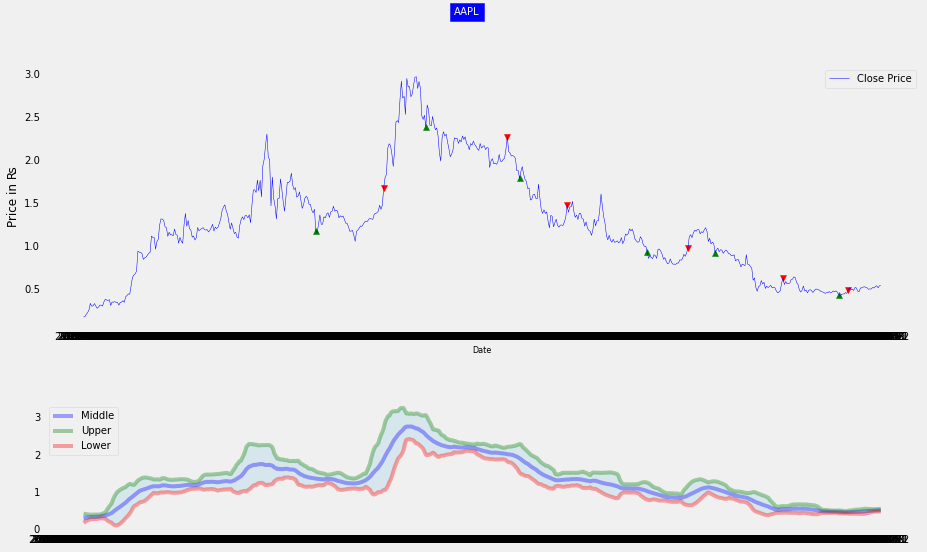

In [64]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()